# <center>Análisis de datos exploratorios (EDA)</center>
## <center>**`Proyecto individual STEAM`** </center>

---

### Se importan las librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud

In [2]:
# Rutas de ubicación para los datasets:
ruta_reviews = 'E:\\AAADATOS\Henry\\AA_Data_Science\\MATERIAL_PI\\PI_ML_OPS_STEAM_DSFT17\\user_reviews.csv'
ruta_items = 'E:\\AAADATOS\Henry\\AA_Data_Science\\MATERIAL_PI\\PI_ML_OPS_STEAM_DSFT17\\user_items.csv'
ruta_games = 'E:\\AAADATOS\Henry\\AA_Data_Science\\MATERIAL_PI\\PI_ML_OPS_STEAM_DSFT17\\user_games.csv'

---

### Se analiza el Data Set de Reviews 

In [3]:
# Se crea el primer Data Frame llamado "df_reviews"
df_reviews = pd.read_csv(ruta_reviews)
df_reviews.head()

,User_Id,Item_Id,Recommend,Year,Date,Sentiment_Analysis
0,76561197970982479,1250,True,2011,2011-11-05,2
1,76561197970982479,22200,True,2011,2011-07-15,2
2,76561197970982479,43110,True,2011,2011-04-21,2
3,js41637,251610,True,2014,2014-06-24,2
4,js41637,227300,True,2013,2013-09-08,2


In [4]:
# Se observa su información general
print(df_reviews.info())
print(f'El tamaño del DataFrame es de {df_reviews.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_Id             59305 non-null  object
 1   Item_Id             59305 non-null  int64 
 2   Recommend           59305 non-null  bool  
 3   Year                59305 non-null  int64 
 4   Date                59305 non-null  object
 5   Sentiment_Analysis  59305 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 2.3+ MB
None
El tamaño del DataFrame es de (59305, 6)


#### Se establecen las variables la cuales van a ser analizadas en el procesado de este Data Set, se van a ignorar de cierta manera los campos “User_Id” e “Item_Id” ya que estos contienen identificadores del sistema STEAM pero de igual manera se les dará un vistazo, la variable “Date” no es relevante para las consignas así que no se entrara a analizar , las variables numéricas que se analizaran en este caso serán dos “Year” y “Sentiment_Analysis”, finalmente la única variable categórica será “Recommend”. 

##### Variables identificadores “User_Id” e“Item_Id” 

In [5]:
# Se crea una función para poder realizar visualizaciones de Tops de cualquier variable  
def plot_top_values(column, top_n=10):
    # Asegurarse de que la columna sea de tipo numérico o string
    if not pd.api.types.is_numeric_dtype(column) and not pd.api.types.is_string_dtype(column):
        try:
            column = column.astype(str)
        except:
            raise ValueError("La columna no es de tipo numérico o string y no se puede convertir.")

    # Obtener los top valores
    top_values = column.value_counts().nlargest(top_n)

    # Crear el gráfico de barras
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

    # Añadir etiquetas y título
    plt.title(f'Top {top_n} Valores Más Frecuentes')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    # Imprimir el gráfico
    plt.show()

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3927760175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3927760175.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


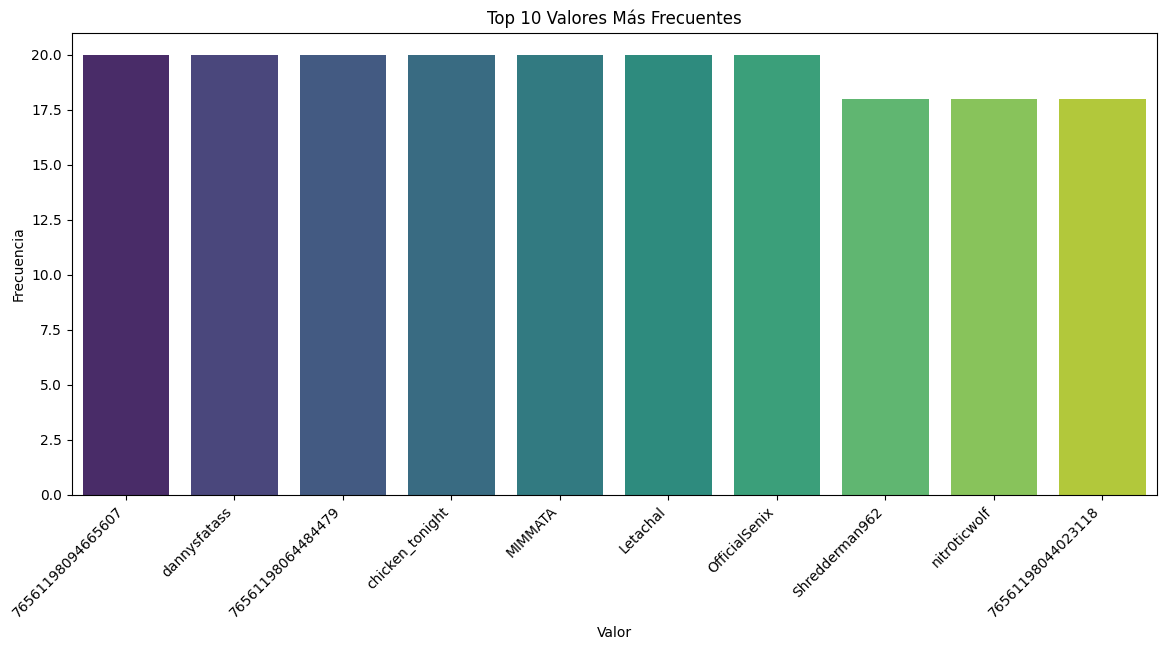

In [6]:
# Se grafica el campo "User_Id" con el Top 10 de usuarios que más reviews dejaron
plot_top_values(df_reviews['User_Id'])

In [7]:
# Se cuentan la cantidad de Usuarios diferentes que hay
df_reviews['User_Id'].unique().shape

(25458,)

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3927760175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3927760175.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


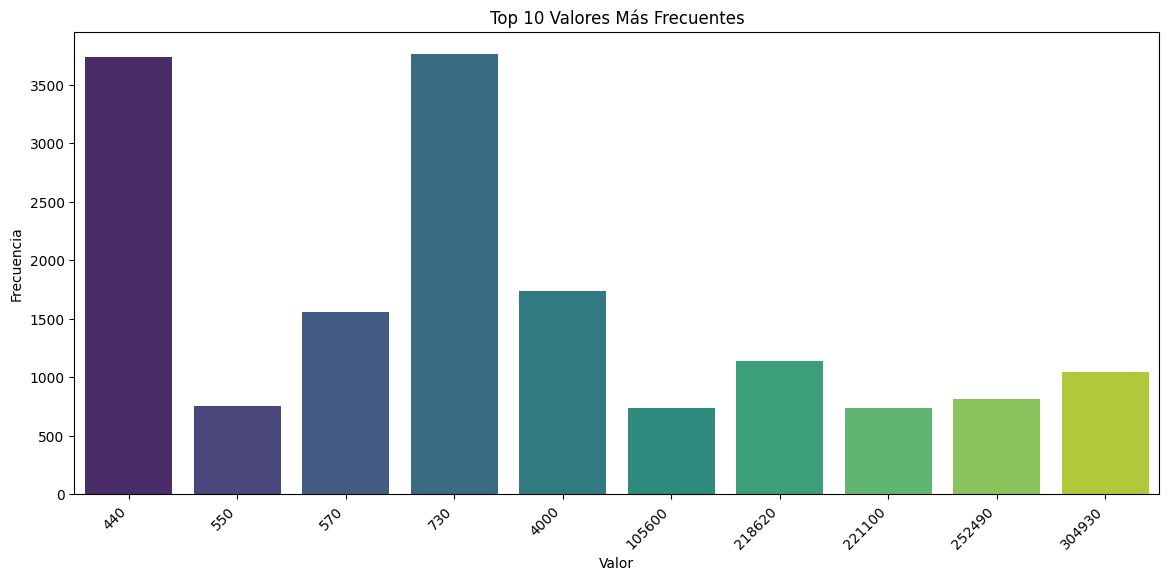

In [8]:
# Se grafica el campo "Item_Id" con el Top 10 de items mas repetidos
plot_top_values(df_reviews['Item_Id'])

In [9]:
# Se cuentan la cantidad de items diferentes que hay
df_reviews['Item_Id'].unique().shape

(3682,)

##### Variable numérica “Year” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\291153690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df_reviews, palette='viridis')


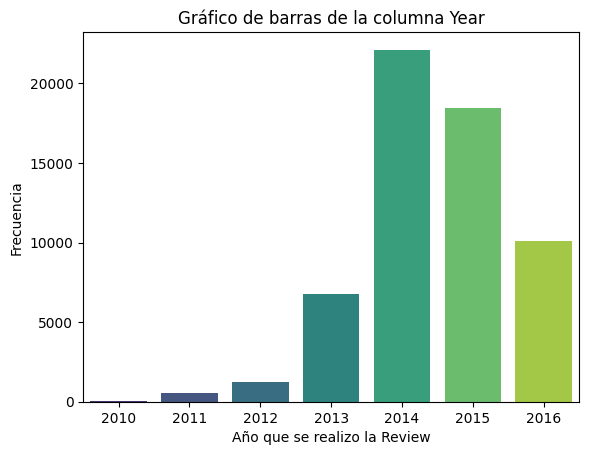

In [10]:
# Se grafica la frecuencia de los años en los que se realizaron las reviews
sns.countplot(x='Year', data=df_reviews, palette='viridis')
plt.title('Gráfico de barras de la columna Year')
plt.xlabel('Año que se realizo la Review')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
# Se contabiliza las cantidades de esas frecuencias 
df_reviews['Year'].value_counts()

Year
2014    22111
2015    18470
2016    10119
2013     6792
2012     1215
2011      532
2010       66
Name: count, dtype: int64

In [12]:
# Se crea una función para optimizar el proceso de visualizar la cantidad de valores únicos y en especial para ver cuanto porcentaje representan  
def porcentajes_valores(columna):
    # Obtener conteo de valores únicos
    conteo_valores = columna.value_counts()

    # Calcular el porcentaje de cada valor
    porcentaje_valores = columna.value_counts(normalize=True) * 100

    # Crear un nuevo DataFrame con los resultados
    analisis_df = pd.DataFrame({
        'Valor único': conteo_valores.index,
        'Cantidad': conteo_valores.values,
        'Porcentaje': porcentaje_valores.values
    })

    return analisis_df

In [13]:
porcentajes_valores(df_reviews['Year'])

,Valor único,Cantidad,Porcentaje
0,2014,22111,37.283534
1,2015,18470,31.144086
2,2016,10119,17.062642
3,2013,6792,11.452660
4,2012,1215,2.048731
5,2011,532,0.897058
6,2010,66,0.111289


>*Se puede observar que el año el año en el que se realizaron más reviews fu el año **`“2014”`**, los tres primeros años desde los que se tiene registro en este DataSet no se realizaron una cantidad considerable de reviews y para finalizar este punto no se puede ser completamente objetivo con la cantidad que expresa el año **`“2016”`** ya que para el momento que se tomó el Data Set aún no se terminaba dicho año.*

##### Variable numérica “Sentiment_Analysis” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\2627686891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Analysis', data=df_reviews, palette='viridis')


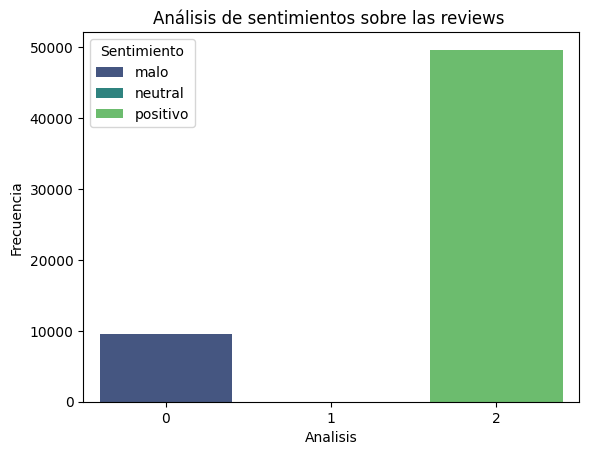

In [14]:
# Se grafica la frecuencia de los sentimientos sobre las reviews
sns.countplot(x='Sentiment_Analysis', data=df_reviews, palette='viridis')
plt.title('Análisis de sentimientos sobre las reviews ')
plt.xlabel('Analisis')
plt.ylabel('Frecuencia')
plt.legend(title='Sentimiento', labels=['malo', 'neutral', 'positivo'])
plt.show()

In [15]:
# Se contabiliza las cantidades de esas frecuencias 
porcentajes_valores(df_reviews['Sentiment_Analysis'])

,Valor único,Cantidad,Porcentaje
0,2,49663,83.741674
1,0,9612,16.207740
2,1,30,0.050586


>*Se encuentra que el sentimiento con mayor presencia en el DataSet es el **`“2”`** que representa el sentimiento **`“positivo”`** superando al sentimiento **`“0”`** ósea el **`“negativo”`** casi por cuatro veces y el sentimiento **`“1”`** que es el sentimiento **`“neutral”`** en este caso tiene casi una minima relevancia solo con una frecuencia de 30 veces. Todo esto quiere decir que en todo el DataSet el sentimiento que más rige e influirá en procesos futuros es el **`“positivo”`**.*

##### Variable categórica “Recommend” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\19714779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommend', data=df_reviews, palette='viridis')


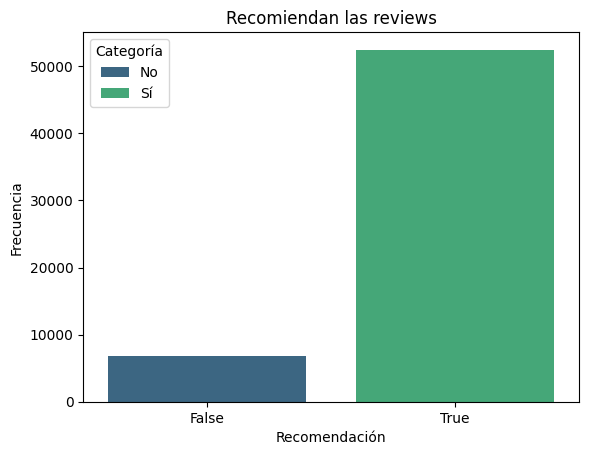

In [16]:
# Se grafica las categorías de las recomendaciones sobre las reviews 
sns.countplot(x='Recommend', data=df_reviews, palette='viridis')
plt.title('Recomiendan las reviews')
plt.xlabel('Recomendación')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', labels=['No', 'Sí'])
plt.show()

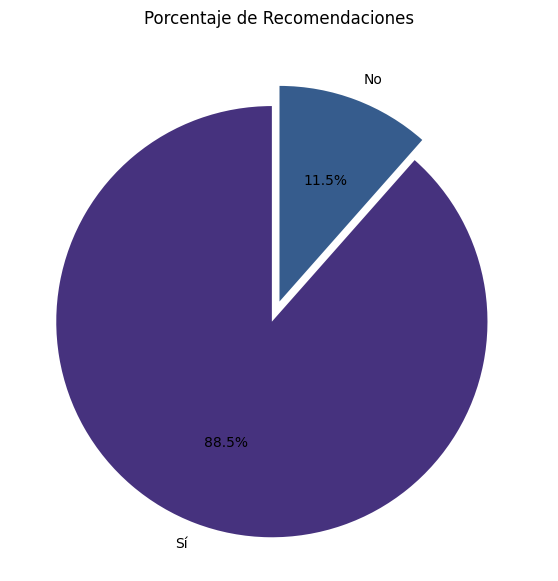

In [17]:
# Se crea un gráfico de torta con representación porcentual  
plt.figure(figsize=(7, 7))
labels = ['Sí', 'No']
sizes = df_reviews['Recommend'].value_counts(normalize=True) * 100  # Calcula el porcentaje
colors = sns.color_palette('viridis')
explode = (0.1, 0)  # Resalta la primera categoría (opcional)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Porcentaje de Recomendaciones')
plt.show()

In [18]:
# Se contabiliza las cantidades de esas frecuencias 
porcentajes_valores(df_reviews['Recommend'])

,Valor único,Cantidad,Porcentaje
0,True,52473,88.479892
1,False,6832,11.520108


>*Se puede observar que el **`“85.5%”`** de las reviews son recomendadas por los demás usuarios siendo esto otra métrica útil para los futuros procesos.*

En este Data Set es importante resaltar que no contiene valores **“outliers”** por que en el proceso de ETL se normalizo lo máximo posible y aunque hay variables numéricas todas se podrían definir como variables que categorizan en algo, tal como el **“año”**, **“Sí”** o **“No”**, **“bueno”** o **“malo”**. Se encuentra además que del total de registros hay solamente **“25458”** únicos en **“User_Id”** osea diferentes usuarios y que también hay **“3682”** registros únicos en el campo de **“Item_Id”** indicando que muchos usuarios dejan sus reviews sobre pocos juegos en comparación. Así que de esta manera se define este Data Set mencionando que por un punto para optimizar se puede prescindir del campo **“Date”** en el siguiente paso que sería para las consultas ya que este campo no es necesario para estas. 

---

### Se analiza el Data Set de Items

In [19]:
# Se crea el primer Data Frame llamado "df_items"
df_items = pd.read_csv(ruta_items)
df_items.head()

,User_Id,Items_Count,Steam_Id,Item_Id,Item_Name,Playtime_Forever_Hours
0,76561197970982479,277,76561197970982479,10,Counter-Strike,1
1,76561197970982479,277,76561197970982479,30,Day of Defeat,1
2,76561197970982479,277,76561197970982479,300,Day of Defeat: Source,79
3,76561197970982479,277,76561197970982479,240,Counter-Strike: Source,31
4,76561197970982479,277,76561197970982479,3830,Psychonauts,6


In [20]:
# Se observa su información general
print(df_items.info())
print(f'El tamaño del DataFrame es de {df_items.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285246 entries, 0 to 3285245
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   User_Id                 object
 1   Items_Count             int64 
 2   Steam_Id                int64 
 3   Item_Id                 int64 
 4   Item_Name               object
 5   Playtime_Forever_Hours  int64 
dtypes: int64(4), object(2)
memory usage: 150.4+ MB
None
El tamaño del DataFrame es de (3285246, 6)


#### Se establecen las variables a ser analizadas en este segundo proceso de EDA, se van a ignorar los campos "User_Id" y "Steam_Id" ya que estas contienen identificadores del sistema STEAM, como variables numéricas se van a considerar los campo "Items_Count", "Item_Id" y "Playtime_Forever_Hours" y finalmente la única variable categórica será "Item_Name".

##### Variable númerica “Item_Id” 

In [21]:
# Se filtra a un nuevo Data Frame estos campos para tener solamente valores únicos de "Items_Count"
items_count = df_items[['User_Id', 'Items_Count']].drop_duplicates()
items_count.head()

,User_Id,Items_Count
0,76561197970982479,277
198,js41637,888
717,evcentric,137
821,Riot-Punch,328
951,doctr,541


In [22]:
# Se observa su tamaño
items_count.shape

(68403, 2)

In [23]:
items_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68403 entries, 0 to 3285241
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_Id      68403 non-null  object
 1   Items_Count  68403 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


Se busca como están distribuidos los valores de los Items de los usuarios  

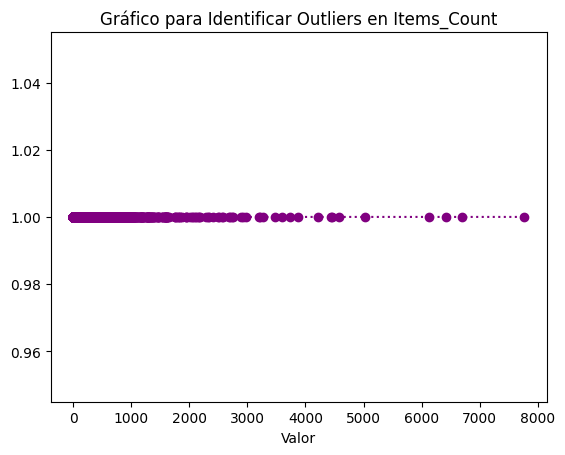

In [24]:
# Se crea una coolumna que contiene solamente los valores de 'Items_Count'
columna_items = items_count['Items_Count']
# Se ordena la columna para tener una línea recta
columna_numerica_sorted = columna_items.sort_values()

# Se crea el gráfico de línea
plt.plot(columna_numerica_sorted, [1] * len(columna_numerica_sorted), marker='o', linestyle=':', color='purple')

# Se añade etiquetas y título
plt.title('Gráfico para Identificar Outliers en Items_Count')
plt.xlabel('Valor')
plt.ylabel('')

# Se muestra el gráfico
plt.show()

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\1856953138.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


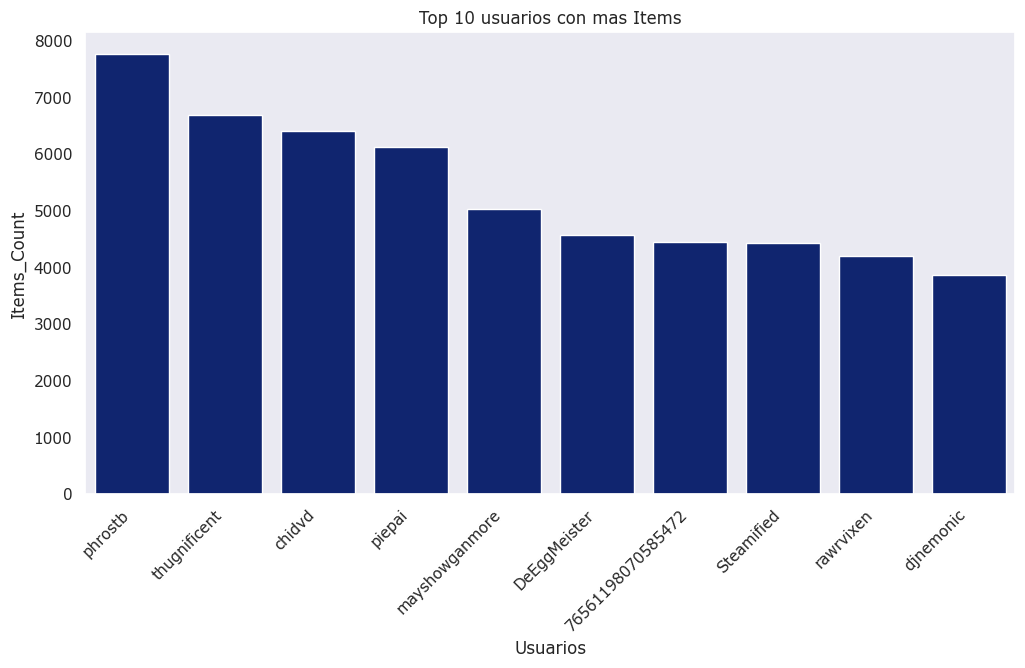

In [25]:
# Se filtra a una nueva variable donde solo esten los Top 10
items_count_top10 = items_count.sort_values(by='Items_Count', ascending=False).head(10)

# Se ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=items_count_top10['User_Id'],y=items_count_top10['Items_Count'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 10 usuarios con mas Items')
plt.xlabel('Usuarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*Se puede evidenciar que la mayoría de los usuarios tienen menos de **`“3000”`** Items asociados a su cuenta Steam mientras que algunos tienen una cantidad superior a **`“5000”`** lo que podría considerarse valores atípicos.* 

##### Variables "Item_Name" y "Playtime_Forever_Hours"

Se crea una nube de palabras con el campo “Item_Name” para tener una idea de cual se repite mas  

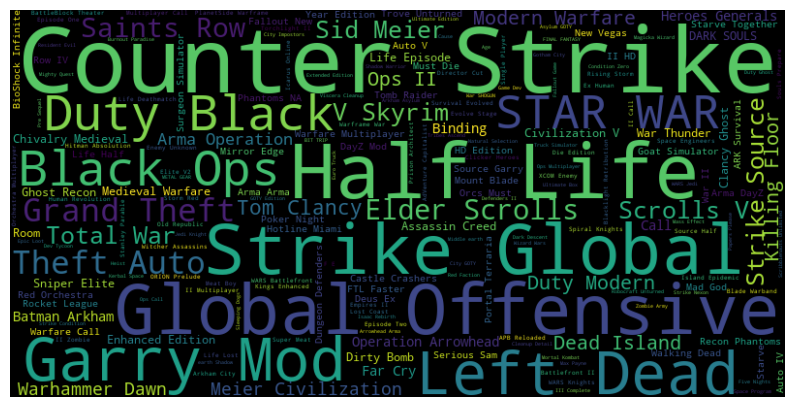

In [26]:
text = ' '.join(df_items['Item_Name'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
# Se filtra a un nuevo Data Frame estos campos para tener únicos de "Item_Name" y las horas acumuladas jugadas a ese Item
items_hours = df_items.groupby(['Item_Name', 'Item_Id'], as_index=False)['Playtime_Forever_Hours'].sum()
items_hours.head()

,Item_Name,Item_Id,Playtime_Forever_Hours
0,神明的一天世界(God's One Day World),490390,117
1,! That Bastard Is Trying To Steal Our Gold !,449940,14
2,"""Glow Ball"" - The billiard puzzle game",388390,7
3,#SelfieTennis,392190,7
4,#killallzombies,303720,22


In [28]:
# Se visualiza el tamaño del nuevo Data Frame
items_hours['Playtime_Forever_Hours'].value_counts().shape

(2544,)

In [29]:
items_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Item_Name               10050 non-null  object
 1   Item_Id                 10050 non-null  int64 
 2   Playtime_Forever_Hours  10050 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 235.7+ KB


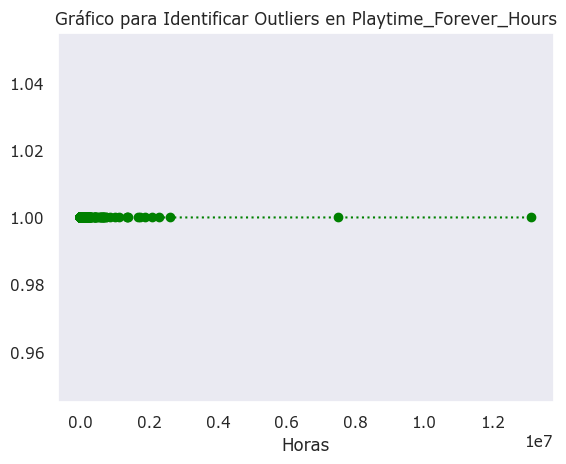

In [30]:
# Se crea una coolumna que contiene solamente los valores de 'Items_hours'
columna_hours = items_hours['Playtime_Forever_Hours']
# Se ordena la columna para tener una línea recta
columna_numerica_sorted = columna_hours.sort_values()

# Se crea el gráfico de línea
plt.plot(columna_numerica_sorted, [1] * len(columna_numerica_sorted), marker='o', linestyle=':', color='green')

# Se añade etiquetas y título
plt.title('Gráfico para Identificar Outliers en Playtime_Forever_Hours')
plt.xlabel('Horas')
plt.ylabel('')

# Se muestra el gráfico
plt.show()

>*Se identifican dos valores que se alejan bastante de la mayoría de los datos así que se procede a verlos específicamente.*

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\405406698.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


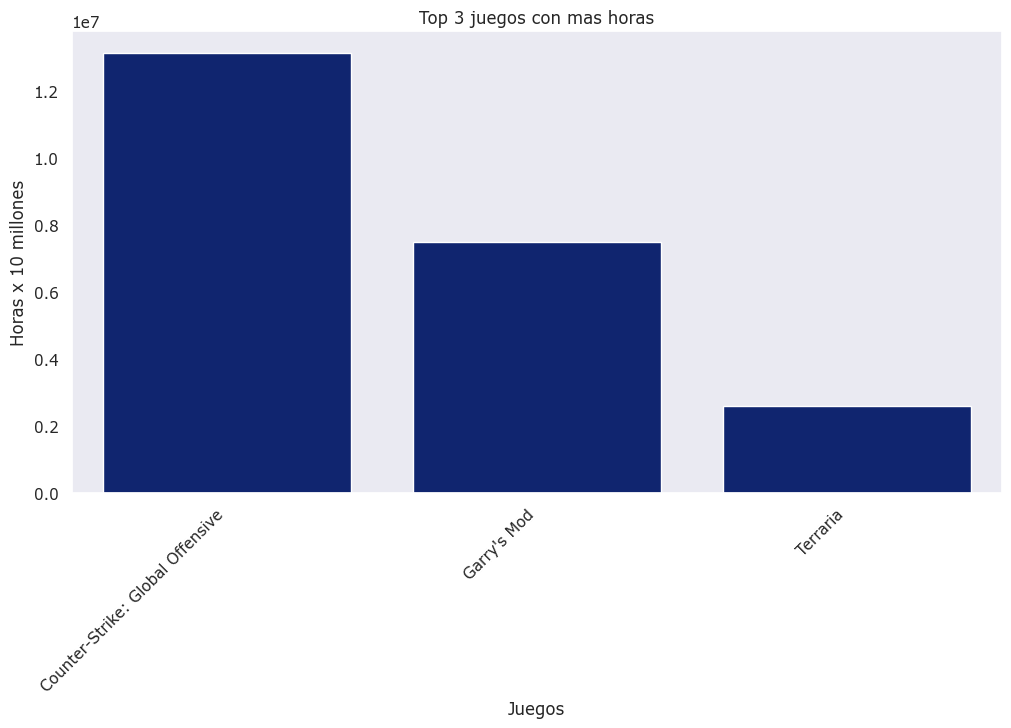

In [31]:
# Se filtra a una nueva variable donde solo esten los Top 3
items_count_top3 = items_hours.sort_values(by='Playtime_Forever_Hours', ascending=False).head(3)

# Se ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=items_count_top3['Item_Name'],y=items_count_top3['Playtime_Forever_Hours'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 3 juegos con mas horas')
plt.xlabel('Juegos')
plt.ylabel('Horas x 10 millones')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*Esta grafica muestra los 3 juegos con más horas jugadas el primero acumula más **`“Doce millones de horas en total”`** y el segundo más de **`“Siete millones”`**, estos jugos son muy populares y han sido juegos activos desde que salieron hasta hoy en día, por lo cual se hace sentido que hayan sido detectados como valores atípicos, pero estos están correctos. También hay que destacar que estos datos empiezan a dar indicios de cuáles son las preferencias de los usuarios.*

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\1415355538.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


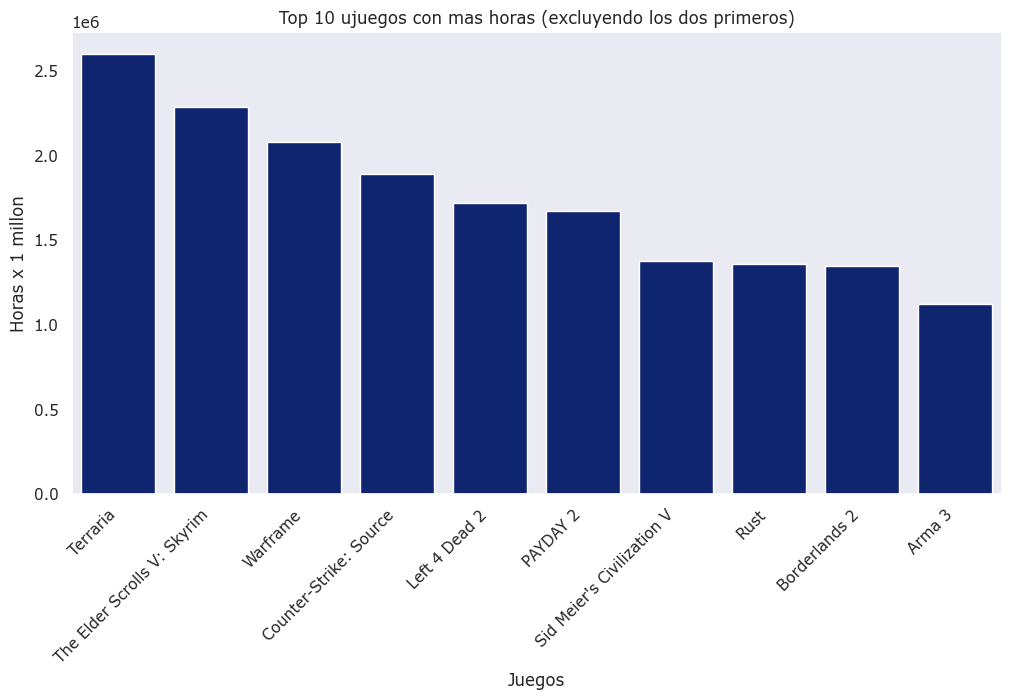

In [32]:
items_count_top10 = items_hours.sort_values(by='Playtime_Forever_Hours', ascending=False).iloc[2:12]

# Se ajusta el tamaño de la figura
plt.figure(figsize=(12, 6))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=items_count_top10['Item_Name'],y=items_count_top10['Playtime_Forever_Hours'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 10 ujuegos con mas horas (excluyendo los dos primeros)')
plt.xlabel('Juegos')
plt.ylabel('Horas x 1 millon')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*En la gráfica anterior se puede apreciar de mejor manera un Top de los juegos con más horas excluyendo a los dos más altos del Top.*

##### Variables "User_Id" y "Playtime_Forever_Hours"

In [33]:
# Se filtra a un nuevo Data Frame estos campos para tener únicos de "User_Id" y las horas acumuladas jugadas a ese Usuario
users_hours = df_items.groupby(['User_Id'], as_index=False)['Playtime_Forever_Hours'].sum()
users_hours.head()

,User_Id,Playtime_Forever_Hours
0,--000--,2377
1,--ace--,1190
2,--ionex--,815
3,-2SV-vuLB-Kg,923
4,-404PageNotFound-,3914


In [34]:
# Se visualiza el tamaño del nuevo Data Frame
users_hours.value_counts().shape

(68403,)

In [35]:
users_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68403 entries, 0 to 68402
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User_Id                 68403 non-null  object
 1   Playtime_Forever_Hours  68403 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


Se crea un gráfico de tipo boxplot para buscar valores anormales 

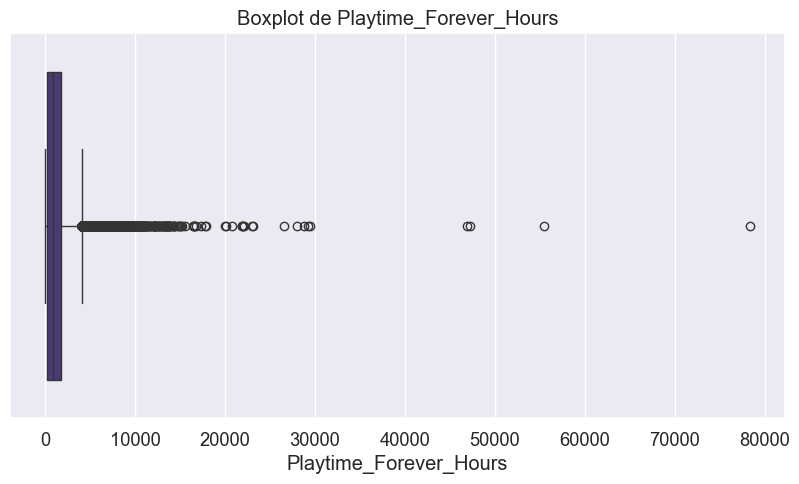

In [36]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 5))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el boxplot
sns.boxplot(x=users_hours['Playtime_Forever_Hours'])

# Se añade etiquetas y título
plt.title('Boxplot de Playtime_Forever_Hours')
plt.xlabel('Playtime_Forever_Hours')

# Se muestra el gráfico
plt.show()

Se hace lo mismo con un gráfico de tipo violinplot pero este no aporta mucha más información 

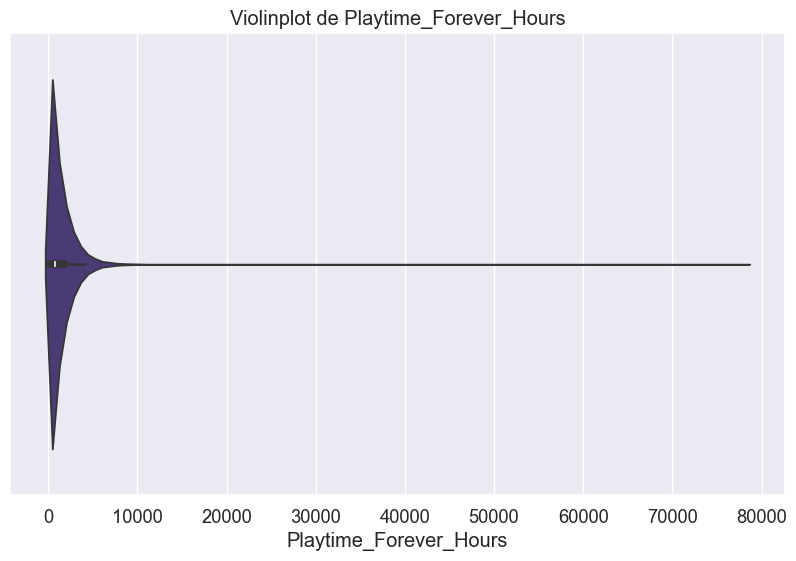

In [37]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el violinplot
sns.violinplot(x=users_hours['Playtime_Forever_Hours'])

# Se añade etiquetas y título
plt.title('Violinplot de Playtime_Forever_Hours')
plt.xlabel('Playtime_Forever_Hours')

# Se muestra el gráfico
plt.show()

Se crea un gráfico de barras con el Top 10 de jugadores con más horas jugadas 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3611669091.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


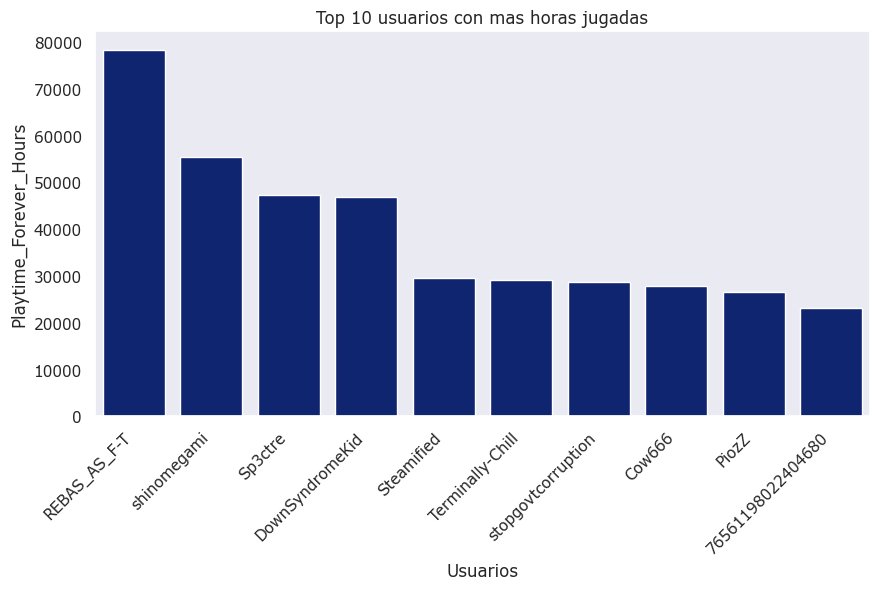

In [38]:
# Se filtra a una nueva variable donde solo esten los Top 10
users_count_top10 = users_hours.sort_values(by='Playtime_Forever_Hours', ascending=False).head(10)

# Se ajusta el tamaño de la figura
plt.figure(figsize=(10, 5))
sns.set(style='dark',palette='dark',font="Verdana",font_scale=1) # Configura el estilo oscuro, paleta oscura, fuente Verdana y escala de fuente 1 en Seaborn
ax = sns.barplot(x=users_count_top10['User_Id'],y=users_count_top10['Playtime_Forever_Hours'])# La variable 'x' representa las categorías en el eje x y 'y' los valores en el eje y
plt.title('Top 10 usuarios con mas horas jugadas')
plt.xlabel('Usuarios')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

>*En base a los anteriores gráficos se puede asumir que los valores atípicos de las horas jugadas por cierta cantidad de usuarios se pueden atribuir a que primero es la suma de varios juegos y segundo que es muy probable que esas horas se hagan en cuentas de usuarios que las comparten o dejan el juego corriendo de manera indeterminada en sus dispositivos.*

In [39]:
# Se filtra a un nuevo Data Frame estos campos para tener solamente valores únicos de "Items_Count"
relacion_items_horas = df_items.groupby(['User_Id', 'Items_Count'], as_index=False)['Playtime_Forever_Hours'].sum()
relacion_items_horas.head()

,User_Id,Items_Count,Playtime_Forever_Hours
0,--000--,58,2377
1,--ace--,44,1190
2,--ionex--,23,815
3,-2SV-vuLB-Kg,68,923
4,-404PageNotFound-,149,3914


En este punto luego de haber revisado diferentes aspectos del Data Set se puede afirmar que los únicos valores que se podrían considerar **“outliers”** serían los que superen el rango de los **“3000”** Items de la columna **“Items_Count”** pero este campo no será necesario para los próximos procesos de los requerimientos así que junto con el campo **“Steam_Id”** se podrá prescindir de ellos ya que parece ser que este último campo es igual a **“User_Id”**, los demás valores atípicos encontrados se pueden justificar de alguna manera así que estos no serán tratados de alguna manera. 

---

### Se analiza el Data Set de Games

In [40]:
# Se crea el primer Data Frame llamado "df_items"
df_games = pd.read_csv(ruta_games)
df_games.head()

,Item_Id,Title,Year,Publisher,Developer,Genres
0,761140,Lost Summoner Kitty,2018,Kotoshiro,Kotoshiro,"Simulation, Casual, Strategy, Action, Indie"
1,643980,Ironbound,2018,"Making Fun, Inc.","Making Fun, Inc.","2D, Design & Illustration, RPG, Trading Card G..."
2,670290,Real Pool 3D - Poolians,2017,Poolians.com,Poolians.com,"Sports, Free to Play, Simulation, Casual, Mult..."
3,767400,弹炸人2222,2017,彼岸领域,彼岸领域,"Adventure, Action, Casual"
4,772540,Battle Royale Trainer,2018,Trickjump Games Ltd,Trickjump Games Ltd,"Sniper, Shooter, Third Person, Simulation, Thi..."


In [41]:
# Se observa su información general
print(df_games.info())
print(f'El tamaño del DataFrame es de {df_games.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28663 entries, 0 to 28662
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Item_Id    28663 non-null  int64 
 1   Title      28663 non-null  object
 2   Year       28663 non-null  int64 
 3   Publisher  28644 non-null  object
 4   Developer  28644 non-null  object
 5   Genres     28663 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.3+ MB
None
El tamaño del DataFrame es de (28663, 6)


#### Se determina que las variables a ser analizadas en este tercer Data Set serán ”Year” como variable numérica, “Developer” y “Genres” como variables categóricas ignorando los demás campos ya que no son tema de análisis para este punto. 

##### Variable númerica “Year” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\1450607194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Year', data=df_games, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\1450607194.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


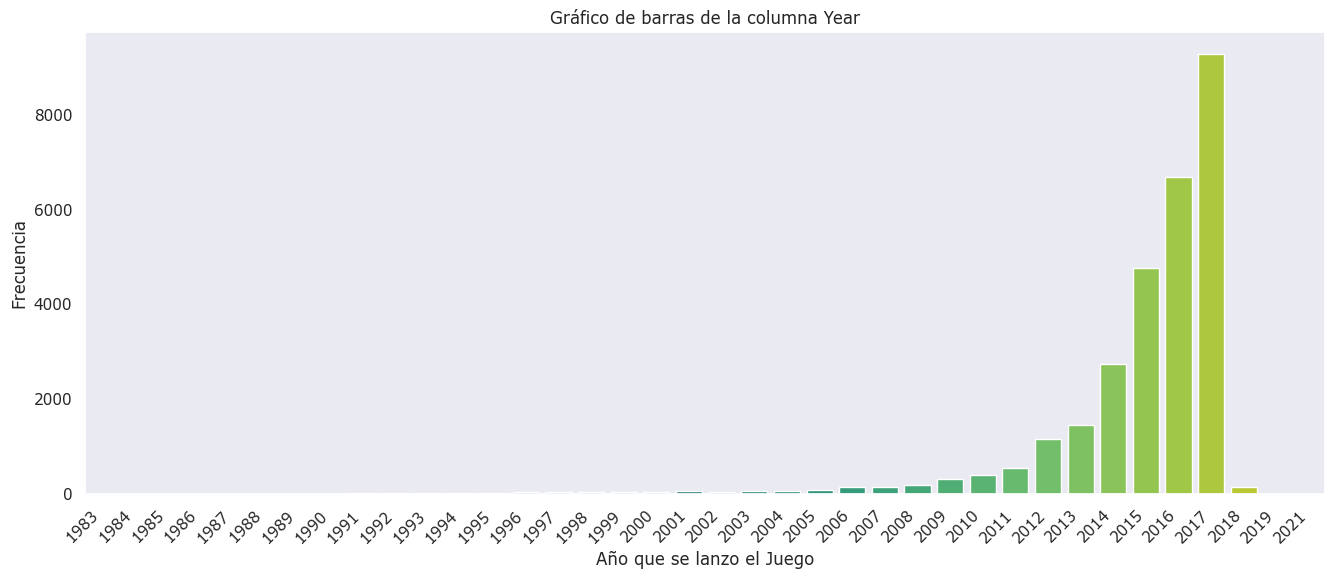

In [42]:
# Se grafica la frecuencia de los años en los que se lanzaron juegos
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='Year', data=df_games, palette='viridis')
plt.title('Gráfico de barras de la columna Year')
plt.xlabel('Año que se lanzo el Juego')
plt.ylabel('Frecuencia')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [43]:
porcentajes_valores(df_games['Year'])

,Valor único,Cantidad,Porcentaje
0,2017,9269,32.337857
1,2016,6670,23.270418
2,2015,4768,16.634686
3,2014,2738,9.552385
4,2013,1459,5.090186
5,2012,1152,4.019119
6,2011,546,1.904895
7,2010,407,1.419949
8,2009,322,1.123400
9,2008,196,0.683808


>*Se destaca el año **`“2017”`** como el año con más lanzamientos por los desarrolladores con un **`“32.3%”`** de todos los registros, es importante destacar que **`”Steam”`** salió en el año **`“2003”`** y se encuentran registros con años menores a este último por lo cual estos años menores al año de lanzamiento puede que no se vean reflejados en procesos posteriores de transformación.*

##### Variable categórica “Developer” 

In [44]:
# Se cuenta la cantidad de desarrolladores que hay en la columna "Developer"
df_games['Developer'].unique().shape

(8692,)

Se crea una nube de palabras con el campo “Developer” para tener una idea de cual se repite mas  

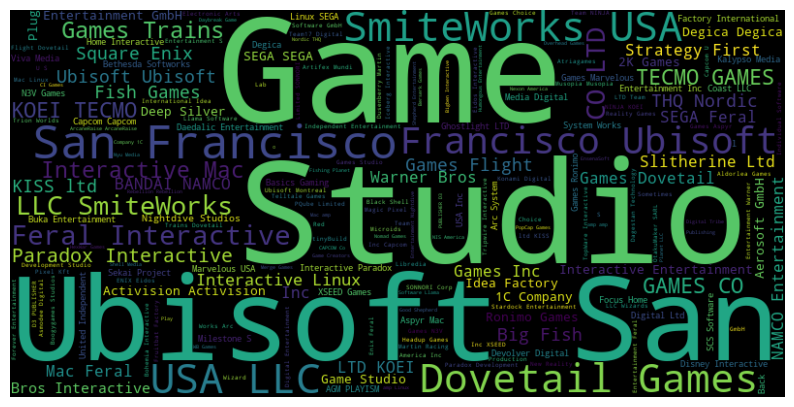

In [45]:
text = ' '.join(df_games['Developer'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se crea un gráfico de barras con el Top 10 de desarrolladores con más juegos 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3927760175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\3927760175.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


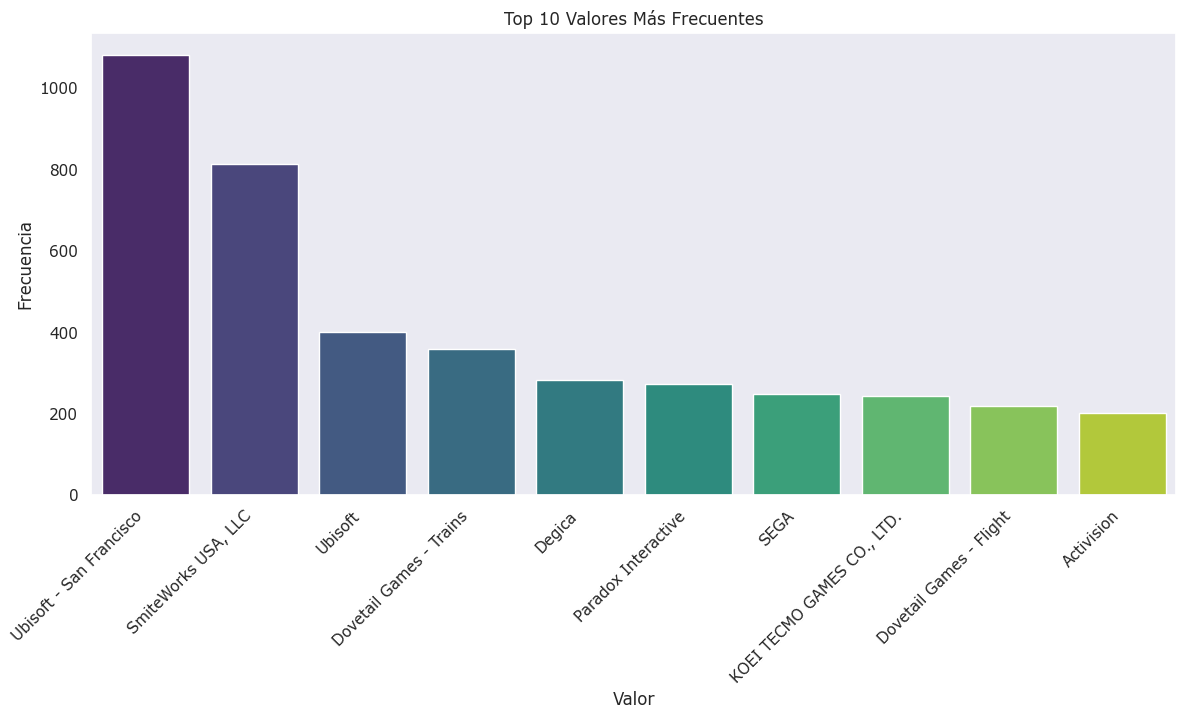

In [46]:
plot_top_values(df_games['Developer'])

Se crea un nuevo Data Frame para analizar más a profundidad el campo “Developer” 

In [47]:
conteo_developer = df_games.groupby('Developer').size().reset_index(name='Conteo')
conteo_developer

,Developer,Conteo
0,(none),2
1,+7 Software,1
2,"+Mpact Games, LLC.",1
3,-,1
4,.M.Y.W.,1
...,...,...
8686,绿叶工作室,1
8687,自由愉悦小黄猫(Free pleasure little yellow cat),1
8688,致意,4
8689,萌石游戏,1


In [48]:
# Se vizualiza el tipo de dato del nuevo Data Frame
conteo_developer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8691 entries, 0 to 8690
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Developer  8691 non-null   object
 1   Conteo     8691 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 135.9+ KB


Se crea un gráfico de tipo boxplot para buscar valores anormales 

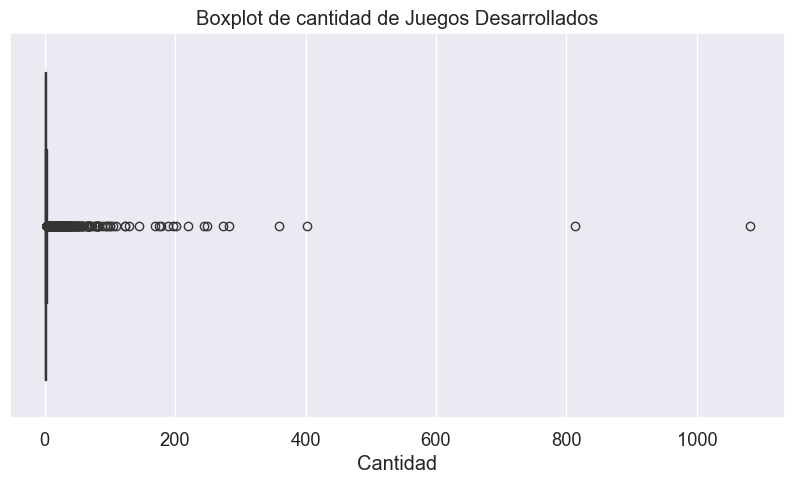

In [49]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 5))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el boxplot
sns.boxplot(x=conteo_developer['Conteo'])

# Se añade etiquetas y título
plt.title('Boxplot de cantidad de Juegos Desarrollados')
plt.xlabel('Cantidad')

# Se muestra el gráfico
plt.show()

In [50]:
# Se crea un Data Frame filtrado excluyendo los desarrolladores con 1 juego en el campo  "Coneto"
conteo_sin_1 = conteo_developer[conteo_developer['Conteo'] != 1] 
conteo_sin_1

,Developer,Conteo
0,(none),2
5,.ez Games,2
7,100 Stones Interactive,4
9,101XP,3
11,10kbit Games,4
...,...,...
8675,弘原游戏,2
8680,橙光游戏,2
8683,灰烬天国,4
8685,疯王子中二集团总部,2


Se elabora una gráfica de barras que mide la frecuencia aplicada a la cantidad de juegos desarrollados excluyendo el valor “1” ya que este ocupaba la mayoría de los valores de “Developer” 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\436680446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Conteo', data=conteo_sin_1, palette='viridis')
C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\436680446.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


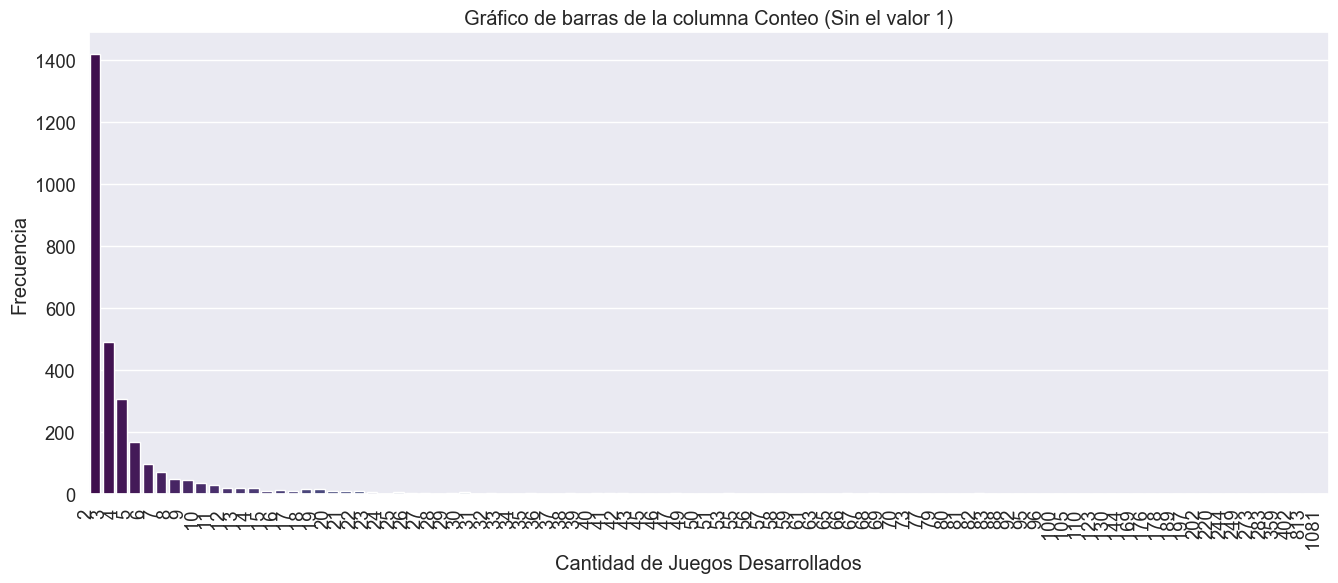

In [51]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='Conteo', data=conteo_sin_1, palette='viridis')
plt.title('Gráfico de barras de la columna Conteo (Sin el valor 1)')
plt.xlabel('Cantidad de Juegos Desarrollados')
plt.ylabel('Frecuencia')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [52]:
# Se filtra el Top 10 de Cantides de Juegos por Desarrollodora excluyendo la cantidad 1
conteo_sin_1['Conteo'].value_counts().head(10)

Conteo
2     1419
3      493
4      308
5      170
6       98
7       73
8       49
9       46
10      38
11      31
Name: count, dtype: int64

In [53]:
print(f'El {100 - (round((3029/8691)*100, 2))}% de los desarrolladores solo han publicado un juego.')

El 65.15% de los desarrolladores solo han publicado un juego.


>*Se destaca el año **`“2017”`** como el año con más lanzamientos por los desarrolladores con un **`“32.3%”`** de todos los registros, es importante destacar que **`”Steam”`** salió en el año **`“2003”`** y se encuentran registros con años menores a este último por lo cual estos años menores al año de lanzamiento puede que no se vean reflejados en procesos posteriores de transformación.*

>*A través del proceso anterior se encontró que el **`“65.15%”`** de los desarrolladores solo han publicado **`“un” juego, las siguientes`** **`“4”`** cantidades de juegos desarrollados ocupan desde casi **`“1400”`** hasta **`“200”`** desarrolladoras eso quiere decir que es una relación inversa entre más juegos se publiquen menos desarrolladoras hay haciéndolo y eso conecta con que el top **`“10”`** de desarrolladoras con más juegos sean grandes compañías dedicadas a esa actividad específicamente, además se hallaron dos filas donde no existe un desarrollador por lo cual en procesos posteriores se procederá a ser eliminados*

##### Variable categórica “Genres” 

In [54]:
df_games['Genres']

0              Simulation, Casual, Strategy, Action, Indie
1        2D, Design & Illustration, RPG, Trading Card G...
2        Sports, Free to Play, Simulation, Casual, Mult...
3                                Adventure, Action, Casual
4        Sniper, Shooter, Third Person, Simulation, Thi...
                               ...                        
28658            Violent, Casual, Adventure, Action, Indie
28659                  Strategy, Simulation, Casual, Indie
28660                              Strategy, Casual, Indie
28661                            Simulation, Racing, Indie
28662    Relaxing, Casual, Singleplayer, Puzzle, Indie,...
Name: Genres, Length: 28663, dtype: object

Se crea una nube de palabras con el campo “Genres” para tener una idea de cual se repite mas  

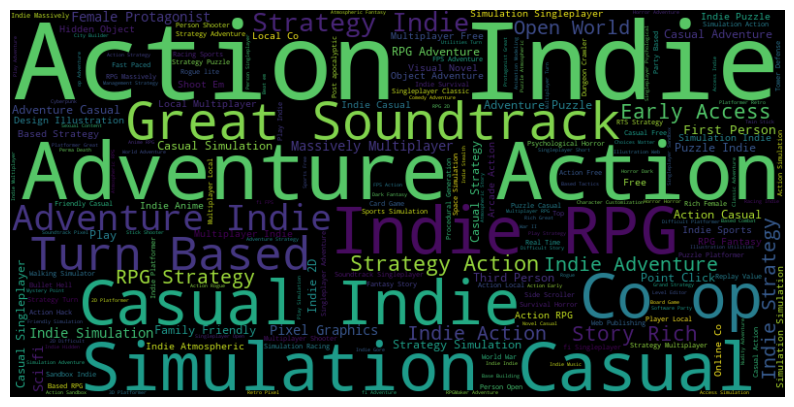

In [55]:
text = ' '.join(df_games['Genres'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [56]:
# se normalizan los géneros individualmente para poder ser contados 
generos_desglosados = df_games['Genres'].str.split(', ')
frecuencia_generos = generos_desglosados.explode().value_counts()
frecuencia_generos

Genres
Indie            16222
Action           11789
Adventure         9157
Casual            8835
Strategy          7309
                 ...  
Voice Control        4
Faith                2
Accounting           2
Hardware             2
Foreign              1
Name: count, Length: 338, dtype: int64

En base a la variable anterior se elabora un Top 10 de géneros más repetidos 

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\4047090553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_palabras10.index, y=top_palabras10.values, palette='viridis')


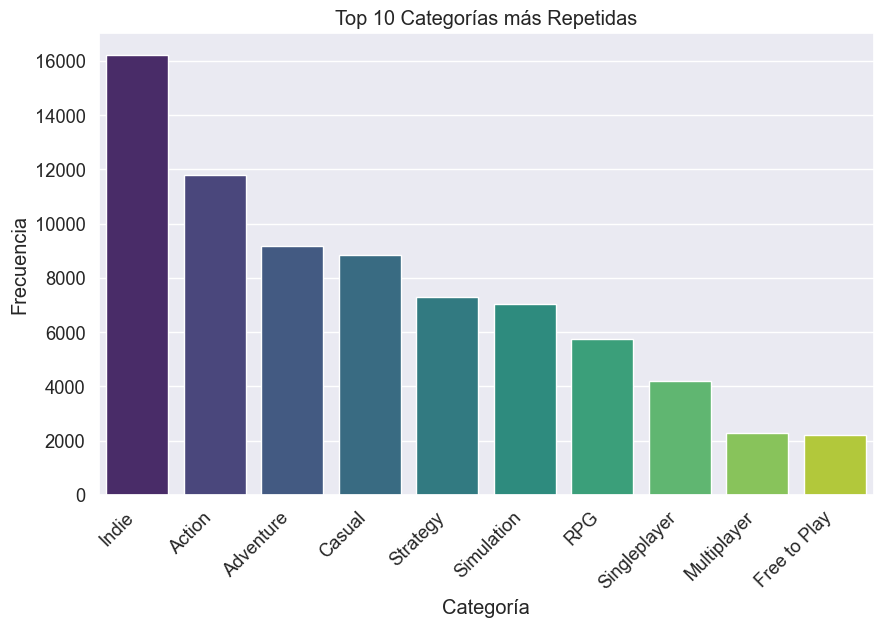

In [57]:
top_palabras10 = frecuencia_generos.head(10)

# Se grafica un Top 10 de las palabras más repetidas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_palabras10.index, y=top_palabras10.values, palette='viridis')
plt.title('Top 10 Categorías más Repetidas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Se ajusta la rotación de las etiquetas si es necesario
plt.show()

Ahora se elabora un Top 20 de géneros más repetidos para visualizar de mejor manera la categoría

C:\Users\DavidssonPC\AppData\Local\Temp\ipykernel_132\391758192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_palabras20.index, y=top_palabras20.values, palette='viridis')


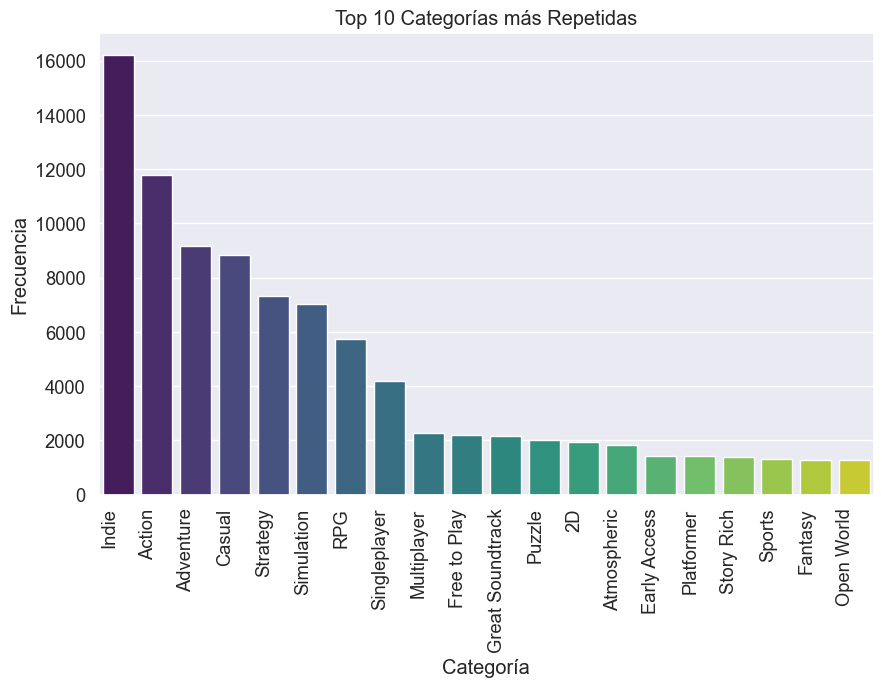

In [58]:
top_palabras20 = frecuencia_generos.head(20)

# Se grafica un Top 10 de las palabras más repetidas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_palabras20.index, y=top_palabras20.values, palette='viridis')
plt.title('Top 10 Categorías más Repetidas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')  # Se ajusta la rotación de las etiquetas si es necesario
plt.show()

Se crea un Data Frame filtrando cada Genero y contando con cuantas veces se repite a lo largo de las filas

In [59]:
df_frecuencia_generos = frecuencia_generos.reset_index()
df_frecuencia_generos.columns = ['Genero', 'Frecuencia']
df_frecuencia_generos

,Genero,Frecuencia
0,Indie,16222
1,Action,11789
2,Adventure,9157
3,Casual,8835
4,Strategy,7309
...,...,...
333,Voice Control,4
334,Faith,2
335,Accounting,2
336,Hardware,2


In [60]:
df_frecuencia_generos.describe()

,Frecuencia
count,338.000000
mean,457.337278
std,1460.387989
min,1.000000
25%,42.000000
50%,106.000000
75%,284.000000
max,16222.000000


Se crea un gráfico de tipo boxplot para buscar visualizar los cuartiles y tendencias

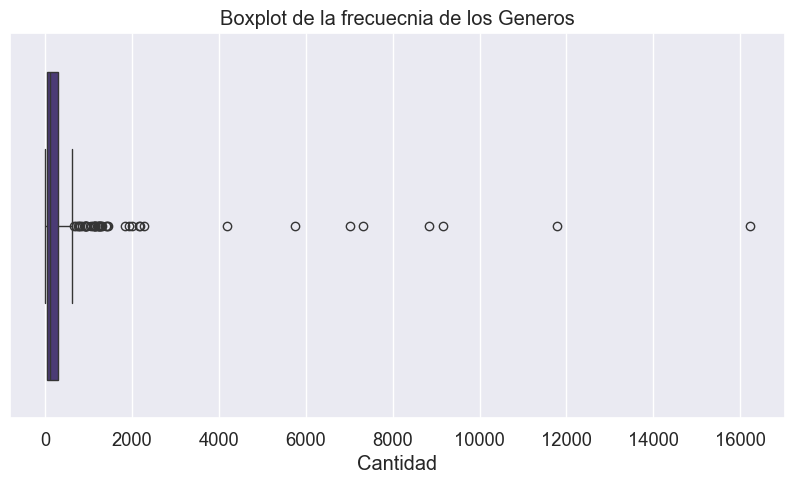

In [61]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 5))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el boxplot
sns.boxplot(x=df_frecuencia_generos['Frecuencia'])

# Se añade etiquetas y título
plt.title('Boxplot de la frecuecnia de los Generos')
plt.xlabel('Cantidad')

# Se muestra el gráfico
plt.show()

Se hace lo mismo con un gráfico de tipo violinplot mostrando una sección de gran acumulación por debajo de 2000 frecuencias

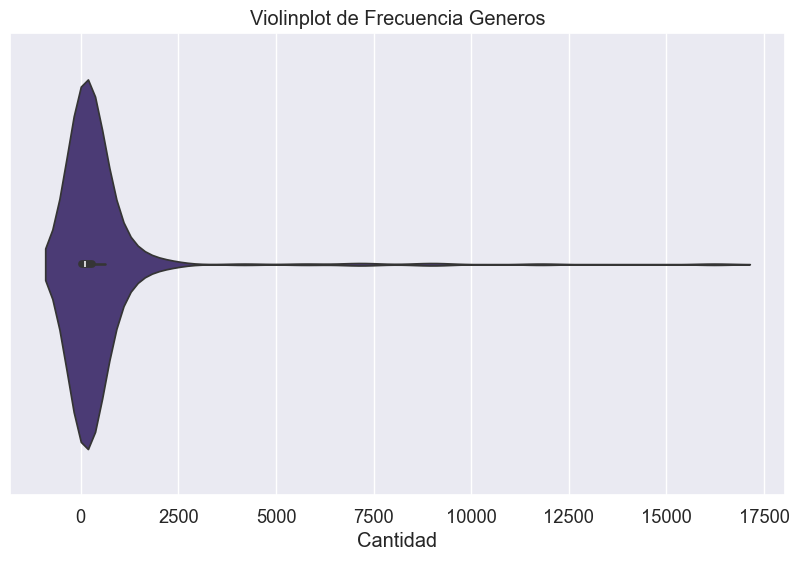

In [62]:
# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el violinplot
sns.violinplot(x=df_frecuencia_generos['Frecuencia'])

# Se añade etiquetas y título
plt.title('Violinplot de Frecuencia Generos')
plt.xlabel('Cantidad')

# Se muestra el gráfico
plt.show()

Se crea un histplot utilizando un filtro de frecuencia menor a 2000

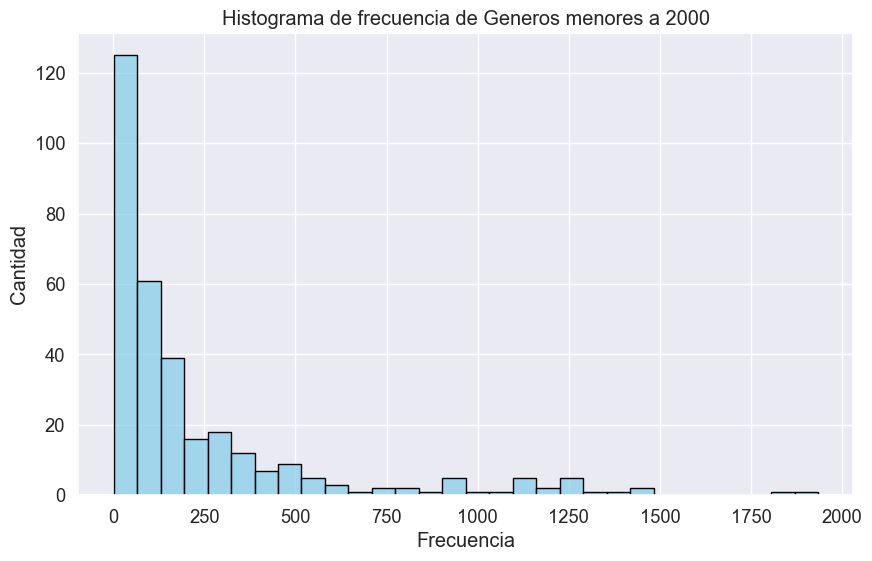

In [63]:
# Se filtra la frecuecnia a menores de 2000
menores_2mil = df_frecuencia_generos[df_frecuencia_generos['Frecuencia'] < 2000]

# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el histograma
sns.histplot(menores_2mil['Frecuencia'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Se añade etiquetas y título
plt.title('Histograma de frecuencia de Generos menores a 2000')
plt.xlabel('Frecuencia')
plt.ylabel('Cantidad')

# Se muestra el gráfico
plt.show()

Con esta nueva información se logra distinguir más variedad en las frecuencias menores a 1000 

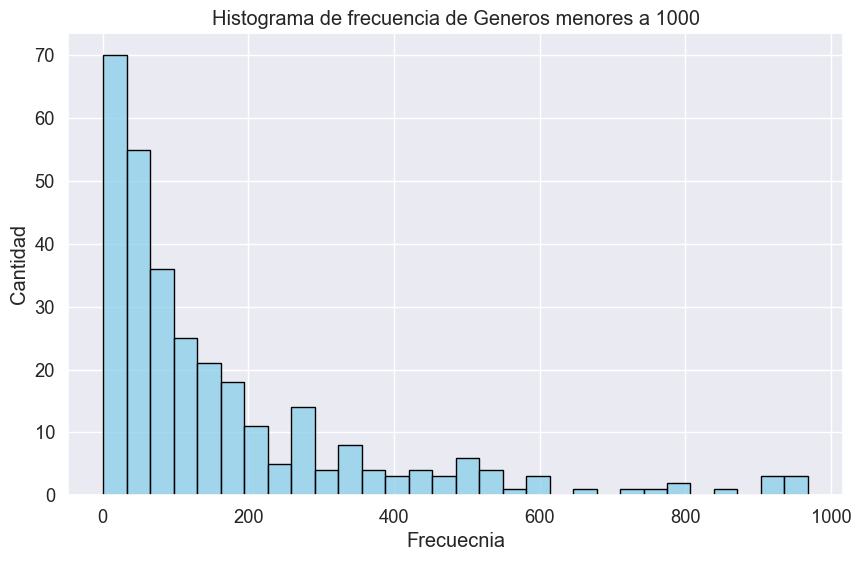

In [64]:
# Se filtra la frecuecnia a menores de 1000
menores_mil = df_frecuencia_generos[df_frecuencia_generos['Frecuencia'] < 1000]

# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el histograma
sns.histplot(menores_mil['Frecuencia'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Se añade etiquetas y título
plt.title('Histograma de frecuencia de Generos menores a 1000')
plt.xlabel('Frecuecnia')
plt.ylabel('Cantidad')

# Se muestra el gráfico
plt.show()

Ahora se distingue una gran tendencia en los menores a una fecuencia de 100 veces

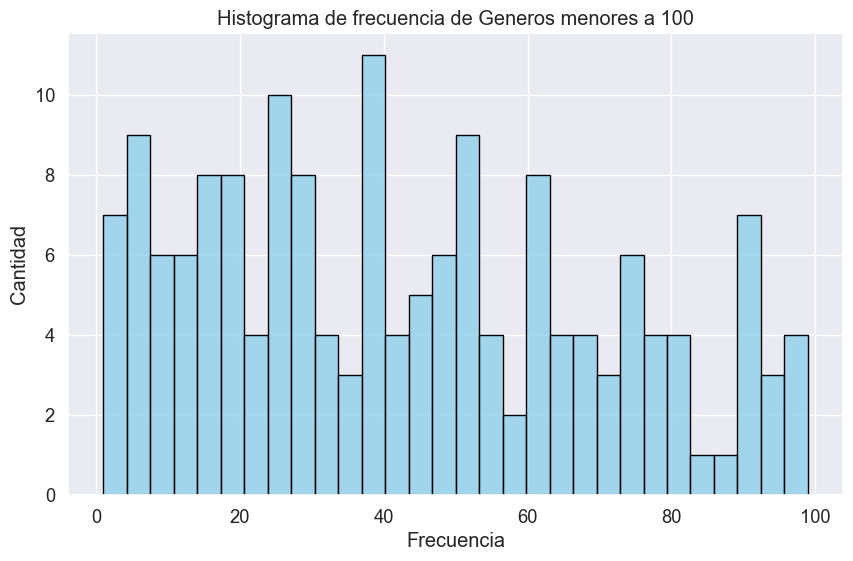

In [65]:
# Se filtra la frecuecnia a menores de 100
menores_100 = df_frecuencia_generos[df_frecuencia_generos['Frecuencia'] < 100]

# Se ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el histograma
sns.histplot(menores_100['Frecuencia'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Se añade etiquetas y título
plt.title('Histograma de frecuencia de Generos menores a 100')
plt.xlabel('Frecuencia')
plt.ylabel('Cantidad')

# Se muestra el gráfico
plt.show()

Se visualiza el Data Frame de la frecuencia menor a 70

In [66]:
menores_100

,Genero,Frecuencia
175,Real-Time with Pause,99
176,Dystopian,98
177,Audio Production,97
178,Loot,96
179,Arena Shooter,94
...,...,...
333,Voice Control,4
334,Faith,2
335,Accounting,2
336,Hardware,2


Se crea una nube de palabras con el campo “Genero” para este filtro de Data Frame para darse una idea de que tipo de Generos tienen esta baja frecuencia

(-0.5, 799.5, 399.5, -0.5)

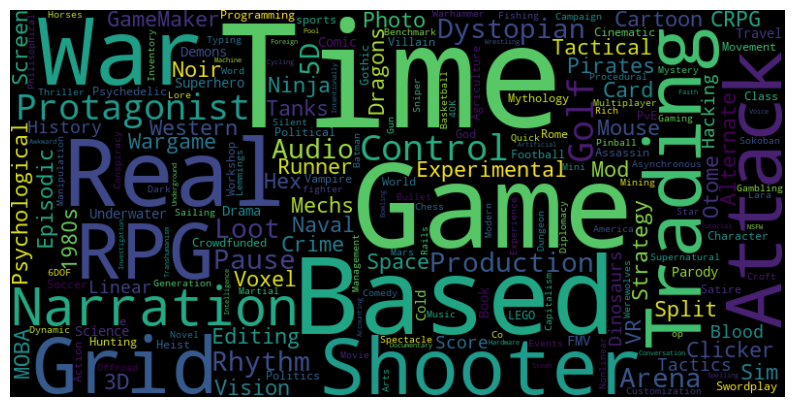

In [67]:
text = ' '.join(menores_100['Genero'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Se extrae una lista con los estos Generos con baja frecuencia ya que va a ser útil para procesos posteriores

In [68]:
anti_generos = menores_100['Genero'].tolist()
print(anti_generos)

['Real-Time with Pause', 'Dystopian', 'Audio Production', 'Loot', 'Arena Shooter', '2.5D', 'Rhythm', 'Experimental', 'Clicker', 'Cartoon', 'Pirates', 'Mechs', 'Wargame', 'Otome', 'Space Sim', 'Hex Grid', 'MOBA', 'GameMaker', 'Real-Time', 'Crime', 'Episodic', 'Noir', 'Photo Editing', 'Naval', 'Trading Card Game', 'VR', 'Ninja', 'Mod', 'Tanks', 'Split Screen', 'Tactical RPG', 'Mouse only', 'Voxel', 'Strategy RPG', '1980s', 'Psychological', 'Dragons', 'Runner', '3D Vision', 'Western', 'CRPG', 'Alternate History', 'Dinosaurs', 'Blood', 'Real Time Tactics', 'Linear', 'Score Attack', 'Hacking', 'Superhero', 'Demons', 'Science', 'FMV', 'Cold War', 'Comic Book', 'Parody', 'Drama', 'Time Travel', 'Underwater', 'Psychedelic', 'Swordplay', 'e-sports', 'Politics', 'Football', 'PvE', 'Narration', 'Trading', 'God Game', 'Political', 'Games Workshop', 'Villain Protagonist', 'Vampire', 'Assassin', 'Heist', 'Hunting', 'Programming', 'Gothic', 'Mythology', 'World War I', 'LEGO', 'Soccer', 'Rome', 'Satir

Se busca visualizar nuevamente las frecuencias menores a 1000 pero esta vez restándole las frecuencias menores a 100 

In [69]:
# Se crea un Data Frame filtrado de las frecuencias menores a 1000 quitandole las frecuencias menores 100
merged = pd.merge(menores_mil, menores_100, how='left', indicator=True)
resultado = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)
resultado


,Genero,Frecuencia
0,First-Person,968
1,Retro,942
2,Turn-Based,939
3,FPS,924
4,Sandbox,918
...,...,...
139,Destruction,105
140,Lovecraftian,105
141,Abstract,104
142,Interactive Fiction,104


In [70]:
# Se crea una lista con los generos mas frecuentes en todo el Data Set ya que será útil para un proceso posterior
generos_mas_frecuentes = resultado['Genero'].head(50)
generos_mas_frecuentes.tolist()
print(list(generos_mas_frecuentes))

['First-Person', 'Retro', 'Turn-Based', 'FPS', 'Sandbox', 'Arcade', 'Point & Click', 'Survival', 'Classic', 'Comedy', 'Family Friendly', 'Space', 'Visual Novel', 'Third Person', 'Gore', 'Online Co-Op', 'Exploration', 'Cute', 'Utilities', '"Shoot Em Up"', 'Hidden Object', 'Local Co-Op', 'Tactical', 'Design & Illustration', 'Local Multiplayer', 'Rogue-like', 'Zombies', 'RPGMaker', 'Controller', 'RTS', 'Violent', 'Turn-Based Strategy', 'Physics', 'Mystery', 'Nudity', 'Psychological Horror', 'Replay Value', 'Puzzle-Platformer', 'Historical', 'Memes', 'Fast-Paced', 'Side Scroller', 'Short', 'Stealth', 'Building', 'Tower Defense', 'Action RPG', 'Management', 'Realistic', 'Dark']


Se realizan dos sub gráficos para poder comparar el proceso que se ha realizado

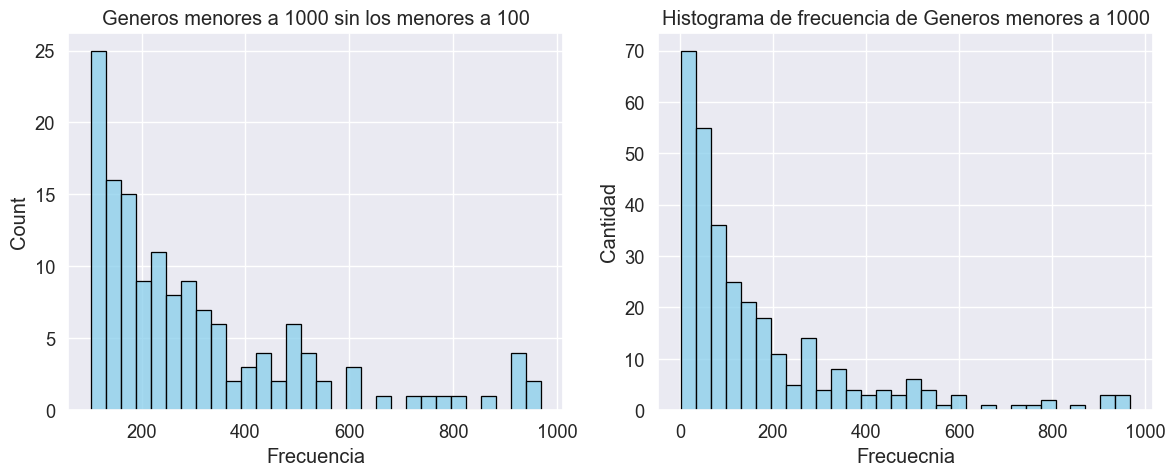

In [71]:
# Se crea una figura con dos subgráficos en una fila
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Se grafica el primer gráfico en el primer subgráfico
# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el histograma
sns.histplot(resultado['Frecuencia'], bins=30, kde=False, color='skyblue', edgecolor='black', ax=axs[0])
axs[0].set_title('Generos menores a 1000 sin los menores a 100')

# Se añade etiquetas y título
plt.title('Histograma de frecuencia de Generos menores a 1000')
plt.xlabel('Frecuecnia')
plt.ylabel('Cantidad')

     # Se grafica el segundo gráfico en el segundo subgráfico
# Se configura el estilo en Seaborn
sns.set(style='darkgrid', palette='viridis', font_scale=1.2)

# Se crea el histograma
sns.histplot(menores_mil['Frecuencia'], bins=30, kde=False, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Gráfico 2')

# Se añade etiquetas y título
plt.title('Histograma de frecuencia de Generos menores a 1000')
plt.xlabel('Frecuecnia')
plt.ylabel('Cantidad')

# Se ajusta el espacio entre los subgráficos
plt.tight_layout()

# Se muestra la figura
plt.show()

In [72]:
print(f'Se considera eliminar el {round((163/338)*100, 2)}% de los géneros ya que este porcentaje representa todas las frecuencias menores a 100.')

Se considera eliminar el 48.22% de los géneros ya que este porcentaje representa todas las frecuencias menores a 100.


>*Ya que se han analizado esta variable categórica que tiene tanta relevancia se puede destacar como abundan los juegos catalogados bajo el género **`“Indie”`** y como las **`“7”`** posiciones del Top **`“10”`** más frecuentes ocupan grandes números a comparación de los siguientes y en base a esto la cantidad de géneros que tienen muy poca frecuencia en comparación es casi la mitad de los géneros.*

En este último Data Set se ha extraído información muy valiosa más que todo sobre el campo **“Year”** y **“Genres”** en ambos casos encontrando patrones que permitirían limpiar más los datos en procesos futuros sacando valores de poca frecuencia que tienen poca relevancia, en el caso de **“Genres”** se considera eliminar el **“48.22%”** de los géneros ya que este porcentaje representa todas las frecuencias menores a **“100”** por medio de una lista que contiene estos géneros. 

___